In [ ]:
import torch
from torch.utils.data import Dataset, DataLoader
from torch import nn

from tensorflow.keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from sklearn.preprocessing import LabelEncoder

import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as plt

from tqdm.notebook import trange , tqdm


ImportError: /home/hassan/anaconda3/envs/computerVision/lib/python3.9/site-packages/torch/lib/libtorch_cuda.so: undefined symbol: ncclCommRegister

In [2]:
learningRate = 0.0001
epochs = 400
batchSize = 32

data = pd.read_csv("../../../tensorflow/learning RNN/example2/Sentiment.csv")
data = data[['text','sentiment']]

data = data[data.sentiment != "Neutral"]
data['text'] = data['text'].apply(lambda x: x.lower())
data['text'] = data['text'].apply((lambda x: re.sub('[^a-zA-z0-9\s]','',x)))


for idx , i in data.iterrows():
    i[0] = i[0].replace('rt',' ')

maxLen = 2000
tokenizer = Tokenizer(num_words=maxLen, split=' ')
tokenizer.fit_on_texts(data['text'].values)
x = tokenizer.texts_to_sequences(data['text'].values)
x = pad_sequences(x)


/tmp/ipykernel_82756/3214003067.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  i[0] = i[0].replace('rt',' ')
/tmp/ipykernel_82756/3214003067.py:14: FutureWarning: Series.__setitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To set a value by position, use `ser.iloc[pos] = value`
  i[0] = i[0].replace('rt',' ')


In [3]:
encoder = LabelEncoder()
y = encoder.fit_transform(data["sentiment"].values.reshape(-1,1))
y


/home/hassan/anaconda3/envs/computerVision/lib/python3.9/site-packages/sklearn/preprocessing/_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([1, 1, 1, ..., 1, 0, 1])

In [4]:
class Data(Dataset):
    def __init__(self, data, labels):
        self.data = torch.tensor(data)
        self.labels = torch.tensor(labels)
        self.len = len(data)
    def __len__(self):
        return self.len
    def __getitem__(self, idx):
        return self.data[idx], self.labels[idx]
    


In [5]:
dataSets = Data(x,y)

trainLoader = DataLoader(dataSets,batch_size=32,shuffle=True,drop_last=True,)
next(iter(trainLoader))[1]


tensor([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0,
        0, 0, 1, 0, 1, 0, 0, 0])

In [6]:
class Model(nn.Module):
    def __init__(self, embedInputs ,outputSize,numLayers=1,hiddenSize=128):
        super().__init__()
        self.embed = nn.Embedding(embedInputs,hiddenSize)
        self.lstm = nn.LSTM(hiddenSize,hiddenSize,numLayers,batch_first=True,dropout=0.5)
        self.dropout = nn.Dropout(0.2)
        self.fc = nn.Linear(hiddenSize,outputSize)

    def forward(self,x):
        x = self.dropout(self.embed(x))
        out,(hidden,mem) = self.lstm(x)
        return self.fc(hidden[-1,:,:]) 



In [7]:

device = torch.device("cuda" if torch.cuda.is_available() else 'cpu')

hidden_size = 64
num_layers = 3


model = Model(embedInputs=maxLen, outputSize=2,numLayers=num_layers, hiddenSize=hidden_size).to(device)

optimizer = torch.optim.Adam(model.parameters(), lr=learningRate)

loss_fn = nn.CrossEntropyLoss()

training_loss_logger = []
test_loss_logger = []
training_acc_logger = []
test_acc_logger = []


In [8]:
pbar = trange(0, epochs, desc="Epoch")

train_acc = 0

for epoch in pbar:
    pbar.set_postfix_str('Accuracy: Train %.2f%%' % (train_acc * 100))
    
    # Set model to training mode
    model.train()
    steps = 0
    
    # Iterate through training data loader
    for x, y in tqdm(trainLoader, desc="Training", leave=False):
        bs = y.shape[0]
    
        y = y.to(device)
        x = x.to(device)
        
        pred = model(x)
        loss = loss_fn(pred, y)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        train_acc += (pred.argmax(1) == y).sum()
        steps += bs
    training_loss_logger.append(loss.item())
    train_acc = (train_acc/steps).item()
    training_acc_logger.append(train_acc)


Epoch:   0%|          | 0/400 [00:00<?, ?it/s]

Training:   0%|          | 0/335 [00:00<?, ?it/s]

Training:   0%|          | 0/335 [00:00<?, ?it/s]

Training:   0%|          | 0/335 [00:00<?, ?it/s]

Training:   0%|          | 0/335 [00:00<?, ?it/s]

Training:   0%|          | 0/335 [00:00<?, ?it/s]

Training:   0%|          | 0/335 [00:00<?, ?it/s]

Training:   0%|          | 0/335 [00:00<?, ?it/s]

Training:   0%|          | 0/335 [00:00<?, ?it/s]

Training:   0%|          | 0/335 [00:00<?, ?it/s]

Training:   0%|          | 0/335 [00:00<?, ?it/s]

Training:   0%|          | 0/335 [00:00<?, ?it/s]

Training:   0%|          | 0/335 [00:00<?, ?it/s]

Training:   0%|          | 0/335 [00:00<?, ?it/s]

Training:   0%|          | 0/335 [00:00<?, ?it/s]

Training:   0%|          | 0/335 [00:00<?, ?it/s]

Training:   0%|          | 0/335 [00:00<?, ?it/s]

Training:   0%|          | 0/335 [00:00<?, ?it/s]

Training:   0%|          | 0/335 [00:00<?, ?it/s]

Training:   0%|          | 0/335 [00:00<?, ?it/s]

Training:   0%|          | 0/335 [00:00<?, ?it/s]

Training:   0%|          | 0/335 [00:00<?, ?it/s]

Training:   0%|          | 0/335 [00:00<?, ?it/s]

Training:   0%|          | 0/335 [00:00<?, ?it/s]

Training:   0%|          | 0/335 [00:00<?, ?it/s]

Training:   0%|          | 0/335 [00:00<?, ?it/s]

Training:   0%|          | 0/335 [00:00<?, ?it/s]

Training:   0%|          | 0/335 [00:00<?, ?it/s]

Training:   0%|          | 0/335 [00:00<?, ?it/s]

Training:   0%|          | 0/335 [00:00<?, ?it/s]

Training:   0%|          | 0/335 [00:00<?, ?it/s]

Training:   0%|          | 0/335 [00:00<?, ?it/s]

Training:   0%|          | 0/335 [00:00<?, ?it/s]

Training:   0%|          | 0/335 [00:00<?, ?it/s]

Training:   0%|          | 0/335 [00:00<?, ?it/s]

Training:   0%|          | 0/335 [00:00<?, ?it/s]

Training:   0%|          | 0/335 [00:00<?, ?it/s]

Training:   0%|          | 0/335 [00:00<?, ?it/s]

Training:   0%|          | 0/335 [00:00<?, ?it/s]

Training:   0%|          | 0/335 [00:00<?, ?it/s]

Training:   0%|          | 0/335 [00:00<?, ?it/s]

Training:   0%|          | 0/335 [00:00<?, ?it/s]

Training:   0%|          | 0/335 [00:00<?, ?it/s]

Training:   0%|          | 0/335 [00:00<?, ?it/s]

Training:   0%|          | 0/335 [00:00<?, ?it/s]

Training:   0%|          | 0/335 [00:00<?, ?it/s]

Training:   0%|          | 0/335 [00:00<?, ?it/s]

Training:   0%|          | 0/335 [00:00<?, ?it/s]

Training:   0%|          | 0/335 [00:00<?, ?it/s]

Training:   0%|          | 0/335 [00:00<?, ?it/s]

Training:   0%|          | 0/335 [00:00<?, ?it/s]

Training:   0%|          | 0/335 [00:00<?, ?it/s]

Training:   0%|          | 0/335 [00:00<?, ?it/s]

Training:   0%|          | 0/335 [00:00<?, ?it/s]

Training:   0%|          | 0/335 [00:00<?, ?it/s]

Training:   0%|          | 0/335 [00:00<?, ?it/s]

Training:   0%|          | 0/335 [00:00<?, ?it/s]

Training:   0%|          | 0/335 [00:00<?, ?it/s]

Training:   0%|          | 0/335 [00:00<?, ?it/s]

Training:   0%|          | 0/335 [00:00<?, ?it/s]

Training:   0%|          | 0/335 [00:00<?, ?it/s]

Training:   0%|          | 0/335 [00:00<?, ?it/s]

Training:   0%|          | 0/335 [00:00<?, ?it/s]

Training:   0%|          | 0/335 [00:00<?, ?it/s]

Training:   0%|          | 0/335 [00:00<?, ?it/s]

Training:   0%|          | 0/335 [00:00<?, ?it/s]

Training:   0%|          | 0/335 [00:00<?, ?it/s]

Training:   0%|          | 0/335 [00:00<?, ?it/s]

Training:   0%|          | 0/335 [00:00<?, ?it/s]

Training:   0%|          | 0/335 [00:00<?, ?it/s]

Training:   0%|          | 0/335 [00:00<?, ?it/s]

Training:   0%|          | 0/335 [00:00<?, ?it/s]

Training:   0%|          | 0/335 [00:00<?, ?it/s]

Training:   0%|          | 0/335 [00:00<?, ?it/s]

Training:   0%|          | 0/335 [00:00<?, ?it/s]

Training:   0%|          | 0/335 [00:00<?, ?it/s]

Training:   0%|          | 0/335 [00:00<?, ?it/s]

Training:   0%|          | 0/335 [00:00<?, ?it/s]

Training:   0%|          | 0/335 [00:00<?, ?it/s]

Training:   0%|          | 0/335 [00:00<?, ?it/s]

Training:   0%|          | 0/335 [00:00<?, ?it/s]

Training:   0%|          | 0/335 [00:00<?, ?it/s]

Training:   0%|          | 0/335 [00:00<?, ?it/s]

Training:   0%|          | 0/335 [00:00<?, ?it/s]

Training:   0%|          | 0/335 [00:00<?, ?it/s]

Training:   0%|          | 0/335 [00:00<?, ?it/s]

Training:   0%|          | 0/335 [00:00<?, ?it/s]

Training:   0%|          | 0/335 [00:00<?, ?it/s]

Training:   0%|          | 0/335 [00:00<?, ?it/s]

Training:   0%|          | 0/335 [00:00<?, ?it/s]

Training:   0%|          | 0/335 [00:00<?, ?it/s]

Training:   0%|          | 0/335 [00:00<?, ?it/s]

Training:   0%|          | 0/335 [00:00<?, ?it/s]

Training:   0%|          | 0/335 [00:00<?, ?it/s]

Training:   0%|          | 0/335 [00:00<?, ?it/s]

Training:   0%|          | 0/335 [00:00<?, ?it/s]

Training:   0%|          | 0/335 [00:00<?, ?it/s]

Training:   0%|          | 0/335 [00:00<?, ?it/s]

Training:   0%|          | 0/335 [00:00<?, ?it/s]

Training:   0%|          | 0/335 [00:00<?, ?it/s]

Training:   0%|          | 0/335 [00:00<?, ?it/s]

Training:   0%|          | 0/335 [00:00<?, ?it/s]

Training:   0%|          | 0/335 [00:00<?, ?it/s]

Training:   0%|          | 0/335 [00:00<?, ?it/s]

Training:   0%|          | 0/335 [00:00<?, ?it/s]

Training:   0%|          | 0/335 [00:00<?, ?it/s]

Training:   0%|          | 0/335 [00:00<?, ?it/s]

Training:   0%|          | 0/335 [00:00<?, ?it/s]

Training:   0%|          | 0/335 [00:00<?, ?it/s]

Training:   0%|          | 0/335 [00:00<?, ?it/s]

Training:   0%|          | 0/335 [00:00<?, ?it/s]

Training:   0%|          | 0/335 [00:00<?, ?it/s]

Training:   0%|          | 0/335 [00:00<?, ?it/s]

Training:   0%|          | 0/335 [00:00<?, ?it/s]

Training:   0%|          | 0/335 [00:00<?, ?it/s]

Training:   0%|          | 0/335 [00:00<?, ?it/s]

Training:   0%|          | 0/335 [00:00<?, ?it/s]

Training:   0%|          | 0/335 [00:00<?, ?it/s]

Training:   0%|          | 0/335 [00:00<?, ?it/s]

Training:   0%|          | 0/335 [00:00<?, ?it/s]

Training:   0%|          | 0/335 [00:00<?, ?it/s]

Training:   0%|          | 0/335 [00:00<?, ?it/s]

Training:   0%|          | 0/335 [00:00<?, ?it/s]

Training:   0%|          | 0/335 [00:00<?, ?it/s]

Training:   0%|          | 0/335 [00:00<?, ?it/s]

Training:   0%|          | 0/335 [00:00<?, ?it/s]

Training:   0%|          | 0/335 [00:00<?, ?it/s]

Training:   0%|          | 0/335 [00:00<?, ?it/s]

Training:   0%|          | 0/335 [00:00<?, ?it/s]

Training:   0%|          | 0/335 [00:00<?, ?it/s]

Training:   0%|          | 0/335 [00:00<?, ?it/s]

Training:   0%|          | 0/335 [00:00<?, ?it/s]

Training:   0%|          | 0/335 [00:00<?, ?it/s]

Training:   0%|          | 0/335 [00:00<?, ?it/s]

Training:   0%|          | 0/335 [00:00<?, ?it/s]

Training:   0%|          | 0/335 [00:00<?, ?it/s]

Training:   0%|          | 0/335 [00:00<?, ?it/s]

Training:   0%|          | 0/335 [00:00<?, ?it/s]

Training:   0%|          | 0/335 [00:00<?, ?it/s]

Training:   0%|          | 0/335 [00:00<?, ?it/s]

Training:   0%|          | 0/335 [00:00<?, ?it/s]

Training:   0%|          | 0/335 [00:00<?, ?it/s]

Training:   0%|          | 0/335 [00:00<?, ?it/s]

Training:   0%|          | 0/335 [00:00<?, ?it/s]

Training:   0%|          | 0/335 [00:00<?, ?it/s]

Training:   0%|          | 0/335 [00:00<?, ?it/s]

Training:   0%|          | 0/335 [00:00<?, ?it/s]

Training:   0%|          | 0/335 [00:00<?, ?it/s]

Training:   0%|          | 0/335 [00:00<?, ?it/s]

Training:   0%|          | 0/335 [00:00<?, ?it/s]

Training:   0%|          | 0/335 [00:00<?, ?it/s]

Training:   0%|          | 0/335 [00:00<?, ?it/s]

Training:   0%|          | 0/335 [00:00<?, ?it/s]

Training:   0%|          | 0/335 [00:00<?, ?it/s]

Training:   0%|          | 0/335 [00:00<?, ?it/s]

Training:   0%|          | 0/335 [00:00<?, ?it/s]

Training:   0%|          | 0/335 [00:00<?, ?it/s]

Training:   0%|          | 0/335 [00:00<?, ?it/s]

Training:   0%|          | 0/335 [00:00<?, ?it/s]

Training:   0%|          | 0/335 [00:00<?, ?it/s]

Training:   0%|          | 0/335 [00:00<?, ?it/s]

Training:   0%|          | 0/335 [00:00<?, ?it/s]

Training:   0%|          | 0/335 [00:00<?, ?it/s]

Training:   0%|          | 0/335 [00:00<?, ?it/s]

Training:   0%|          | 0/335 [00:00<?, ?it/s]

Training:   0%|          | 0/335 [00:00<?, ?it/s]

Training:   0%|          | 0/335 [00:00<?, ?it/s]

Training:   0%|          | 0/335 [00:00<?, ?it/s]

Training:   0%|          | 0/335 [00:00<?, ?it/s]

Training:   0%|          | 0/335 [00:00<?, ?it/s]

Training:   0%|          | 0/335 [00:00<?, ?it/s]

Training:   0%|          | 0/335 [00:00<?, ?it/s]

Training:   0%|          | 0/335 [00:00<?, ?it/s]

Training:   0%|          | 0/335 [00:00<?, ?it/s]

Training:   0%|          | 0/335 [00:00<?, ?it/s]

Training:   0%|          | 0/335 [00:00<?, ?it/s]

Training:   0%|          | 0/335 [00:00<?, ?it/s]

Training:   0%|          | 0/335 [00:00<?, ?it/s]

Training:   0%|          | 0/335 [00:00<?, ?it/s]

Training:   0%|          | 0/335 [00:00<?, ?it/s]

Training:   0%|          | 0/335 [00:00<?, ?it/s]

Training:   0%|          | 0/335 [00:00<?, ?it/s]

Training:   0%|          | 0/335 [00:00<?, ?it/s]

Training:   0%|          | 0/335 [00:00<?, ?it/s]

Training:   0%|          | 0/335 [00:00<?, ?it/s]

Training:   0%|          | 0/335 [00:00<?, ?it/s]

Training:   0%|          | 0/335 [00:00<?, ?it/s]

Training:   0%|          | 0/335 [00:00<?, ?it/s]

Training:   0%|          | 0/335 [00:00<?, ?it/s]

Training:   0%|          | 0/335 [00:00<?, ?it/s]

Training:   0%|          | 0/335 [00:00<?, ?it/s]

Training:   0%|          | 0/335 [00:00<?, ?it/s]

Training:   0%|          | 0/335 [00:00<?, ?it/s]

Training:   0%|          | 0/335 [00:00<?, ?it/s]

Training:   0%|          | 0/335 [00:00<?, ?it/s]

Training:   0%|          | 0/335 [00:00<?, ?it/s]

Training:   0%|          | 0/335 [00:00<?, ?it/s]

Training:   0%|          | 0/335 [00:00<?, ?it/s]

Training:   0%|          | 0/335 [00:00<?, ?it/s]

Training:   0%|          | 0/335 [00:00<?, ?it/s]

Training:   0%|          | 0/335 [00:00<?, ?it/s]

Training:   0%|          | 0/335 [00:00<?, ?it/s]

Training:   0%|          | 0/335 [00:00<?, ?it/s]

Training:   0%|          | 0/335 [00:00<?, ?it/s]

Training:   0%|          | 0/335 [00:00<?, ?it/s]

Training:   0%|          | 0/335 [00:00<?, ?it/s]

Training:   0%|          | 0/335 [00:00<?, ?it/s]

Training:   0%|          | 0/335 [00:00<?, ?it/s]

Training:   0%|          | 0/335 [00:00<?, ?it/s]

Training:   0%|          | 0/335 [00:00<?, ?it/s]

Training:   0%|          | 0/335 [00:00<?, ?it/s]

Training:   0%|          | 0/335 [00:00<?, ?it/s]

Training:   0%|          | 0/335 [00:00<?, ?it/s]

Training:   0%|          | 0/335 [00:00<?, ?it/s]

Training:   0%|          | 0/335 [00:00<?, ?it/s]

Training:   0%|          | 0/335 [00:00<?, ?it/s]

Training:   0%|          | 0/335 [00:00<?, ?it/s]

Training:   0%|          | 0/335 [00:00<?, ?it/s]

Training:   0%|          | 0/335 [00:00<?, ?it/s]

Training:   0%|          | 0/335 [00:00<?, ?it/s]

Training:   0%|          | 0/335 [00:00<?, ?it/s]

Training:   0%|          | 0/335 [00:00<?, ?it/s]

Training:   0%|          | 0/335 [00:00<?, ?it/s]

Training:   0%|          | 0/335 [00:00<?, ?it/s]

Training:   0%|          | 0/335 [00:00<?, ?it/s]

Training:   0%|          | 0/335 [00:00<?, ?it/s]

Training:   0%|          | 0/335 [00:00<?, ?it/s]

Training:   0%|          | 0/335 [00:00<?, ?it/s]

Training:   0%|          | 0/335 [00:00<?, ?it/s]

Training:   0%|          | 0/335 [00:00<?, ?it/s]

Training:   0%|          | 0/335 [00:00<?, ?it/s]

Training:   0%|          | 0/335 [00:00<?, ?it/s]

Training:   0%|          | 0/335 [00:00<?, ?it/s]

Training:   0%|          | 0/335 [00:00<?, ?it/s]

Training:   0%|          | 0/335 [00:00<?, ?it/s]

Training:   0%|          | 0/335 [00:00<?, ?it/s]

Training:   0%|          | 0/335 [00:00<?, ?it/s]

Training:   0%|          | 0/335 [00:00<?, ?it/s]

Training:   0%|          | 0/335 [00:00<?, ?it/s]

Training:   0%|          | 0/335 [00:00<?, ?it/s]

Training:   0%|          | 0/335 [00:00<?, ?it/s]

Training:   0%|          | 0/335 [00:00<?, ?it/s]

Training:   0%|          | 0/335 [00:00<?, ?it/s]

Training:   0%|          | 0/335 [00:00<?, ?it/s]

Training:   0%|          | 0/335 [00:00<?, ?it/s]

Training:   0%|          | 0/335 [00:00<?, ?it/s]

Training:   0%|          | 0/335 [00:00<?, ?it/s]

Training:   0%|          | 0/335 [00:00<?, ?it/s]

Training:   0%|          | 0/335 [00:00<?, ?it/s]

Training:   0%|          | 0/335 [00:00<?, ?it/s]

Training:   0%|          | 0/335 [00:00<?, ?it/s]

Training:   0%|          | 0/335 [00:00<?, ?it/s]

Training:   0%|          | 0/335 [00:00<?, ?it/s]

Training:   0%|          | 0/335 [00:00<?, ?it/s]

Training:   0%|          | 0/335 [00:00<?, ?it/s]

Training:   0%|          | 0/335 [00:00<?, ?it/s]

Training:   0%|          | 0/335 [00:00<?, ?it/s]

Training:   0%|          | 0/335 [00:00<?, ?it/s]

Training:   0%|          | 0/335 [00:00<?, ?it/s]

Training:   0%|          | 0/335 [00:00<?, ?it/s]

Training:   0%|          | 0/335 [00:00<?, ?it/s]

Training:   0%|          | 0/335 [00:00<?, ?it/s]

Training:   0%|          | 0/335 [00:00<?, ?it/s]

Training:   0%|          | 0/335 [00:00<?, ?it/s]

Training:   0%|          | 0/335 [00:00<?, ?it/s]

Training:   0%|          | 0/335 [00:00<?, ?it/s]

Training:   0%|          | 0/335 [00:00<?, ?it/s]

Training:   0%|          | 0/335 [00:00<?, ?it/s]

Training:   0%|          | 0/335 [00:00<?, ?it/s]

Training:   0%|          | 0/335 [00:00<?, ?it/s]

Training:   0%|          | 0/335 [00:00<?, ?it/s]

Training:   0%|          | 0/335 [00:00<?, ?it/s]

Training:   0%|          | 0/335 [00:00<?, ?it/s]

Training:   0%|          | 0/335 [00:00<?, ?it/s]

Training:   0%|          | 0/335 [00:00<?, ?it/s]

Training:   0%|          | 0/335 [00:00<?, ?it/s]

Training:   0%|          | 0/335 [00:00<?, ?it/s]

Training:   0%|          | 0/335 [00:00<?, ?it/s]

Training:   0%|          | 0/335 [00:00<?, ?it/s]

Training:   0%|          | 0/335 [00:00<?, ?it/s]

Training:   0%|          | 0/335 [00:00<?, ?it/s]

Training:   0%|          | 0/335 [00:00<?, ?it/s]

Training:   0%|          | 0/335 [00:00<?, ?it/s]

Training:   0%|          | 0/335 [00:00<?, ?it/s]

Training:   0%|          | 0/335 [00:00<?, ?it/s]

Training:   0%|          | 0/335 [00:00<?, ?it/s]

Training:   0%|          | 0/335 [00:00<?, ?it/s]

Training:   0%|          | 0/335 [00:00<?, ?it/s]

Training:   0%|          | 0/335 [00:00<?, ?it/s]

Training:   0%|          | 0/335 [00:00<?, ?it/s]

Training:   0%|          | 0/335 [00:00<?, ?it/s]

Training:   0%|          | 0/335 [00:00<?, ?it/s]

Training:   0%|          | 0/335 [00:00<?, ?it/s]

Training:   0%|          | 0/335 [00:00<?, ?it/s]

Training:   0%|          | 0/335 [00:00<?, ?it/s]

Training:   0%|          | 0/335 [00:00<?, ?it/s]

Training:   0%|          | 0/335 [00:00<?, ?it/s]

Training:   0%|          | 0/335 [00:00<?, ?it/s]

Training:   0%|          | 0/335 [00:00<?, ?it/s]

Training:   0%|          | 0/335 [00:00<?, ?it/s]

Training:   0%|          | 0/335 [00:00<?, ?it/s]

Training:   0%|          | 0/335 [00:00<?, ?it/s]

Training:   0%|          | 0/335 [00:00<?, ?it/s]

Training:   0%|          | 0/335 [00:00<?, ?it/s]

Training:   0%|          | 0/335 [00:00<?, ?it/s]

Training:   0%|          | 0/335 [00:00<?, ?it/s]

Training:   0%|          | 0/335 [00:00<?, ?it/s]

Training:   0%|          | 0/335 [00:00<?, ?it/s]

Training:   0%|          | 0/335 [00:00<?, ?it/s]

Training:   0%|          | 0/335 [00:00<?, ?it/s]

Training:   0%|          | 0/335 [00:00<?, ?it/s]

Training:   0%|          | 0/335 [00:00<?, ?it/s]

Training:   0%|          | 0/335 [00:00<?, ?it/s]

Training:   0%|          | 0/335 [00:00<?, ?it/s]

Training:   0%|          | 0/335 [00:00<?, ?it/s]

Training:   0%|          | 0/335 [00:00<?, ?it/s]

Training:   0%|          | 0/335 [00:00<?, ?it/s]

Training:   0%|          | 0/335 [00:00<?, ?it/s]

Training:   0%|          | 0/335 [00:00<?, ?it/s]

Training:   0%|          | 0/335 [00:00<?, ?it/s]

Training:   0%|          | 0/335 [00:00<?, ?it/s]

Training:   0%|          | 0/335 [00:00<?, ?it/s]

Training:   0%|          | 0/335 [00:00<?, ?it/s]

Training:   0%|          | 0/335 [00:00<?, ?it/s]

Training:   0%|          | 0/335 [00:00<?, ?it/s]

Training:   0%|          | 0/335 [00:00<?, ?it/s]

Training:   0%|          | 0/335 [00:00<?, ?it/s]

Training:   0%|          | 0/335 [00:00<?, ?it/s]

Training:   0%|          | 0/335 [00:00<?, ?it/s]

Training:   0%|          | 0/335 [00:00<?, ?it/s]

Training:   0%|          | 0/335 [00:00<?, ?it/s]

Training:   0%|          | 0/335 [00:00<?, ?it/s]

Training:   0%|          | 0/335 [00:00<?, ?it/s]

Training:   0%|          | 0/335 [00:00<?, ?it/s]

Training:   0%|          | 0/335 [00:00<?, ?it/s]

Training:   0%|          | 0/335 [00:00<?, ?it/s]

Training:   0%|          | 0/335 [00:00<?, ?it/s]

Training:   0%|          | 0/335 [00:00<?, ?it/s]

Training:   0%|          | 0/335 [00:00<?, ?it/s]

Training:   0%|          | 0/335 [00:00<?, ?it/s]

Training:   0%|          | 0/335 [00:00<?, ?it/s]

Training:   0%|          | 0/335 [00:00<?, ?it/s]

Training:   0%|          | 0/335 [00:00<?, ?it/s]

Training:   0%|          | 0/335 [00:00<?, ?it/s]

Training:   0%|          | 0/335 [00:00<?, ?it/s]

Training:   0%|          | 0/335 [00:00<?, ?it/s]

Training:   0%|          | 0/335 [00:00<?, ?it/s]

Training:   0%|          | 0/335 [00:00<?, ?it/s]

Training:   0%|          | 0/335 [00:00<?, ?it/s]

Training:   0%|          | 0/335 [00:00<?, ?it/s]

Training:   0%|          | 0/335 [00:00<?, ?it/s]

Training:   0%|          | 0/335 [00:00<?, ?it/s]

Training:   0%|          | 0/335 [00:00<?, ?it/s]

Training:   0%|          | 0/335 [00:00<?, ?it/s]

Training:   0%|          | 0/335 [00:00<?, ?it/s]

Training:   0%|          | 0/335 [00:00<?, ?it/s]

Training:   0%|          | 0/335 [00:00<?, ?it/s]

Training:   0%|          | 0/335 [00:00<?, ?it/s]

Training:   0%|          | 0/335 [00:00<?, ?it/s]

Training:   0%|          | 0/335 [00:00<?, ?it/s]

Training:   0%|          | 0/335 [00:00<?, ?it/s]

Training:   0%|          | 0/335 [00:00<?, ?it/s]

Training:   0%|          | 0/335 [00:00<?, ?it/s]

Training:   0%|          | 0/335 [00:00<?, ?it/s]

Training:   0%|          | 0/335 [00:00<?, ?it/s]

Training:   0%|          | 0/335 [00:00<?, ?it/s]

Training:   0%|          | 0/335 [00:00<?, ?it/s]

Training:   0%|          | 0/335 [00:00<?, ?it/s]

Training:   0%|          | 0/335 [00:00<?, ?it/s]

Training:   0%|          | 0/335 [00:00<?, ?it/s]

Training:   0%|          | 0/335 [00:00<?, ?it/s]

Training:   0%|          | 0/335 [00:00<?, ?it/s]

Training:   0%|          | 0/335 [00:00<?, ?it/s]

Training:   0%|          | 0/335 [00:00<?, ?it/s]

Training:   0%|          | 0/335 [00:00<?, ?it/s]

Training:   0%|          | 0/335 [00:00<?, ?it/s]

Training:   0%|          | 0/335 [00:00<?, ?it/s]

Training:   0%|          | 0/335 [00:00<?, ?it/s]

Training:   0%|          | 0/335 [00:00<?, ?it/s]

Training:   0%|          | 0/335 [00:00<?, ?it/s]

Training:   0%|          | 0/335 [00:00<?, ?it/s]

Training:   0%|          | 0/335 [00:00<?, ?it/s]

Training:   0%|          | 0/335 [00:00<?, ?it/s]

Training:   0%|          | 0/335 [00:00<?, ?it/s]

Training:   0%|          | 0/335 [00:00<?, ?it/s]

Training:   0%|          | 0/335 [00:00<?, ?it/s]

Training:   0%|          | 0/335 [00:00<?, ?it/s]

Training:   0%|          | 0/335 [00:00<?, ?it/s]

Training:   0%|          | 0/335 [00:00<?, ?it/s]

Training:   0%|          | 0/335 [00:00<?, ?it/s]

Training:   0%|          | 0/335 [00:00<?, ?it/s]

Training:   0%|          | 0/335 [00:00<?, ?it/s]

Training:   0%|          | 0/335 [00:00<?, ?it/s]

Training:   0%|          | 0/335 [00:00<?, ?it/s]

Training:   0%|          | 0/335 [00:00<?, ?it/s]

Training:   0%|          | 0/335 [00:00<?, ?it/s]

Training:   0%|          | 0/335 [00:00<?, ?it/s]

Training:   0%|          | 0/335 [00:00<?, ?it/s]

Training:   0%|          | 0/335 [00:00<?, ?it/s]

Training:   0%|          | 0/335 [00:00<?, ?it/s]

Training:   0%|          | 0/335 [00:00<?, ?it/s]

In [9]:
print(training_acc_logger[-1])


0.9694934487342834


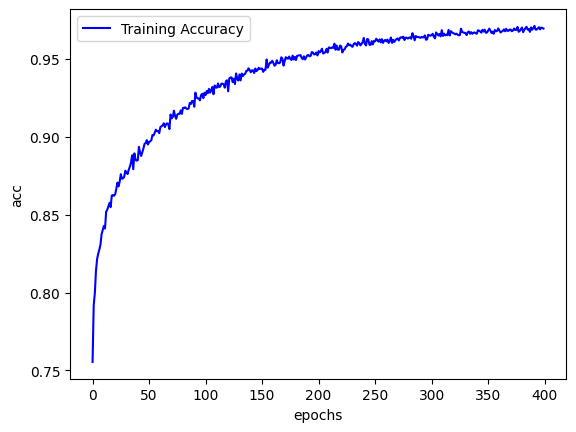

In [12]:
plt.plot(range(epochs),training_acc_logger,"b",label= "Training Accuracy")

plt.ylabel("acc")
plt.xlabel("epochs")
plt.legend()


In [13]:
torch.cuda.empty_cache()


In [ ]:
def predict(model, sentence, tokenizer, maxLen, device):
    model.eval()
    sentence = sentence.lower()
    sentence = re.sub('[^a-zA-z0-9\s]', '', sentence)
    sentence = sentence.replace('rt', ' ')
    sequence = tokenizer.texts_to_sequences([sentence])
    padded_sequence = pad_sequences(sequence, maxlen=maxLen)
    

    tensor = torch.tensor(padded_sequence, dtype=torch.long).to(device)
    

    with torch.no_grad():
        output = model(tensor)
        prob = torch.softmax(output, dim=1)
        predicted_class = prob.argmax(1).item()
    
    sentiment = "Positive" if predicted_class == 1 else "Negative"
    return sentiment


sentence = "i'm very happy"
prediction = predict(model, sentence, tokenizer, maxLen, device)
print(f"Predicted Sentiment: {prediction}")


Predicted Sentiment: Positive


In [19]:
torch.save(model.state_dict(),"model.pth")
